# General Assembly Capstone: Time Series Forecasting of Texas Electricity Data
----

## <span style="color:Green">01 - Preprocessing - Merging & Cleaning 2012 Data</span>      
----

### Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data

Source data can be found at http://www.ercot.com/gridinfo/generation

In [3]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2012.xls', sheet_name = None)

In [4]:
df.keys()

dict_keys(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])

## 2. Clean the data

#### Combine all sheets into one dataframe

In [5]:
cdf = pd.concat(df,sort=False)

#### The 'Date-Fuel' column contains data we need, so let's separate them

In [6]:
cdf.rename(columns = {'Date-Fuel': 'fuel'}, inplace=True)
cdf

fuel          Total     00:15:00     00:30:00  \
Dec 0    12/01/12_Biomass     869.281425     9.694032     9.762346   
    1       12/01/12_Coal  237851.559100  2130.939640  2050.142415   
    2        12/01/12_Gas   18135.739180   156.876798   157.101716   
    3     12/01/12_Gas-CC  212497.862100  1244.165363  1213.717533   
    4      12/01/12_Hydro     707.505941     3.152086     2.785787   
...                   ...            ...          ...          ...   
Jan 274    01/31/12-Hydro    1214.517433    12.019676    12.003854   
    275  01/31/12-Nuclear   90906.872520   948.768814   948.670106   
    276    01/31/12-Other     432.339145     3.900291     3.894856   
    277      01/31/12-Sun     128.788627     0.000000     0.000000   
    278     01/31/12-Wind   78029.002620  1535.338263  1531.580759   

            00:45:00     01:00:00     01:15:00     01:30:00     01:45:00  \
Dec 0       9.803130     9.837561     9.837940     9.848034     9.858063   
    1    2001.038037  1948.494496  1902.067653  1828.057689  1762.289013   
    2     155.747037   156.319977   155.924622   156.088432   156.081391   
    3    1194.820490  1184.001406  1159.009788  1182.993112  1212.592746   
    4       2.782355     2.786000     2.763409     2.747072     2.752009   
...              ...          ...          ...          ...          ...   
Jan 274    12.020080    12.083839    12.048898    12.076885    12.046369   
    275   948.545784   948.554942   947.487927   947.393985   947.469113   
    276     3.894896     3.891105     4.398885     4.654375     4.632175   
    277     0.000000     0.000000     0.000000     0.000000     0.000000   
    278  1529.945460  1529.057538  1528.568247  1529.304690  1524.775402   

            02:00:00  ...  DST4  Unnamed: 98  Unnamed: 99  Unnamed: 100  \
Dec 0       9.886432  ...   NaN          NaN          NaN           NaN   
    1    1724.691620  ...   NaN          NaN          NaN           NaN   
    2     157.054813  ...   NaN          NaN          NaN           NaN   
    3    1234.351072  ...   NaN          NaN          NaN           NaN   
    4       2.750056  ...   NaN          NaN          NaN           NaN   
...              ...  ...   ...          ...          ...           ...   
Jan 274    12.028494  ...   NaN          NaN          NaN           NaN   
    275   947.285932  ...   NaN          NaN          NaN           NaN   
    276     4.627292  ...   NaN          NaN          NaN           NaN   
    277     0.000000  ...   NaN          NaN          NaN           NaN   
    278  1521.435793  ...   NaN          NaN          NaN           NaN   

         Unnamed: 101  1900-01-01 00:00:00  dst1  dst2  dst3  dst4  
Dec 0             NaN                  NaN   NaN   NaN   NaN   NaN  
    1             NaN                  NaN   NaN   NaN   NaN   NaN  
    2             NaN                  NaN   NaN   NaN   NaN   NaN  
    3             NaN                  NaN   NaN   NaN   NaN   NaN  
    4             NaN                  NaN   NaN   NaN   NaN   NaN  
...               ...                  ...   ...   ...   ...   ...  
Jan 274           NaN            11.480437   0.0   0.0   0.0   0.0  
    275           NaN           946.917342   0.0   0.0   0.0   0.0  
    276           NaN             4.988715   0.0   0.0   0.0   0.0  
    277           NaN             0.000000   0.0   0.0   0.0   0.0  
    278           NaN           724.857221   0.0   0.0   0.0   0.0  

[3300 rows x 111 columns]

In [7]:
date = []
fuel = []
for each in cdf['fuel']:
    date.append(each[:8])
    fuel.append(each[9:])

In [8]:
cdf['Date'] = date
cdf['Fuel'] = fuel

#### Select only the date, fuel type, and total electricity generated by fuel type for that day as new dataframe

In [9]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [10]:
full_df

Date     Fuel          Total
Dec 0    12/01/12  Biomass     869.281425
    1    12/01/12     Coal  237851.559100
    2    12/01/12      Gas   18135.739180
    3    12/01/12   Gas-CC  212497.862100
    4    12/01/12    Hydro     707.505941
...           ...      ...            ...
Jan 274  01/31/12    Hydro    1214.517433
    275  01/31/12  Nuclear   90906.872520
    276  01/31/12    Other     432.339145
    277  01/31/12      Sun     128.788627
    278  01/31/12     Wind   78029.002620

[3300 rows x 3 columns]

#### For consistency across notebooks, replace 'Sun' for 'Solar' and 'Gas_CC' for 'Gas-CC'

In [11]:
full_df['Fuel'] = full_df['Fuel'].replace('Sun','Solar')
full_df['Fuel'] = full_df['Fuel'].replace('Gas_CC','Gas-CC')


<ipython-input-11-88ebca457217>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['Fuel'] = full_df['Fuel'].replace('Sun','Solar')
<ipython-input-11-88ebca457217>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['Fuel'] = full_df['Fuel'].replace('Gas_CC','Gas-CC')


In [12]:
full_df

Date     Fuel          Total
Dec 0    12/01/12  Biomass     869.281425
    1    12/01/12     Coal  237851.559100
    2    12/01/12      Gas   18135.739180
    3    12/01/12   Gas-CC  212497.862100
    4    12/01/12    Hydro     707.505941
...           ...      ...            ...
Jan 274  01/31/12    Hydro    1214.517433
    275  01/31/12  Nuclear   90906.872520
    276  01/31/12    Other     432.339145
    277  01/31/12    Solar     128.788627
    278  01/31/12     Wind   78029.002620

[3300 rows x 3 columns]

#### Transpose the data such that the energy sources are columns and every row is a unique day throughout the year

In [13]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

In [14]:
full_df

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind
0,869.281425,237851.5591,18135.73918,212497.8621,707.505941,123916.5462,573.604937,215.930344,129841.14130
1,876.354549,257148.9385,17412.22040,204907.1217,648.231948,123911.9046,576.995742,197.388069,125540.31240
2,919.860335,273217.6515,15902.63739,258589.8982,758.143065,123870.5912,508.432071,205.926720,115198.15980
3,961.694048,261765.2689,18369.60455,276304.9815,679.989206,123816.6095,481.496846,139.634252,79925.34046
4,786.413150,246951.9593,19163.65306,306277.8899,722.931711,123963.5275,414.930121,401.044146,46272.74952
...,...,...,...,...,...,...,...,...,...
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.425939,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.557086,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.964256,NaN
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.939623,NaN


#### Because we lost the data columns while transposing, create a new daily date column and set it as the index

In [15]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2012-01-01', periods=len(full_df), freq='D')

In [17]:
full_df.tail()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind,date
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.425939,NaN,2013-01-02
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.557086,NaN,2013-01-03
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.964256,NaN,2013-01-04
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.939623,NaN,2013-01-05
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.788627,NaN,2013-01-06


#### Above, we can see extra data was entered in the Solar column that continues into 2013. Let's remove these values.

In [150]:
full_df.drop(index=[366, 367, 368, 369, 370, 371], inplace=True)

#### Now, let's set our newly created 'date' column as our index

In [18]:
full_df = full_df.set_index('date')
full_df

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind
date,,,,,,,,,
2012-01-01,869.281425,237851.5591,18135.73918,212497.8621,707.505941,123916.5462,573.604937,215.930344,129841.14130
2012-01-02,876.354549,257148.9385,17412.22040,204907.1217,648.231948,123911.9046,576.995742,197.388069,125540.31240
2012-01-03,919.860335,273217.6515,15902.63739,258589.8982,758.143065,123870.5912,508.432071,205.926720,115198.15980
2012-01-04,961.694048,261765.2689,18369.60455,276304.9815,679.989206,123816.6095,481.496846,139.634252,79925.34046
2012-01-05,786.413150,246951.9593,19163.65306,306277.8899,722.931711,123963.5275,414.930121,401.044146,46272.74952
...,...,...,...,...,...,...,...,...,...
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.425939,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.557086,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.964256,NaN


# 3. Visualize the Data

In [19]:
full_df['NGas'] = full_df['Gas'] + full_df['Gas-CC']
full_df.drop(columns = ['Gas', 'Gas-CC'], inplace = True)

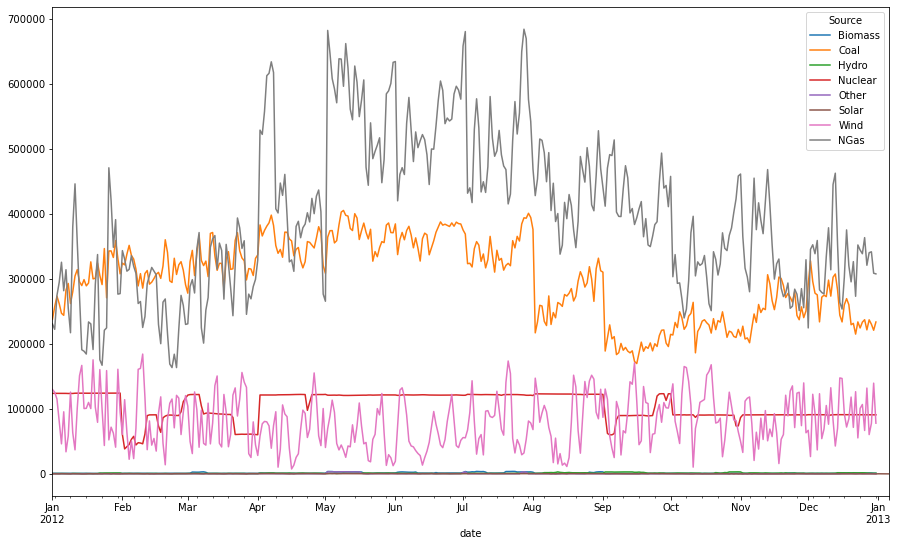

In [20]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


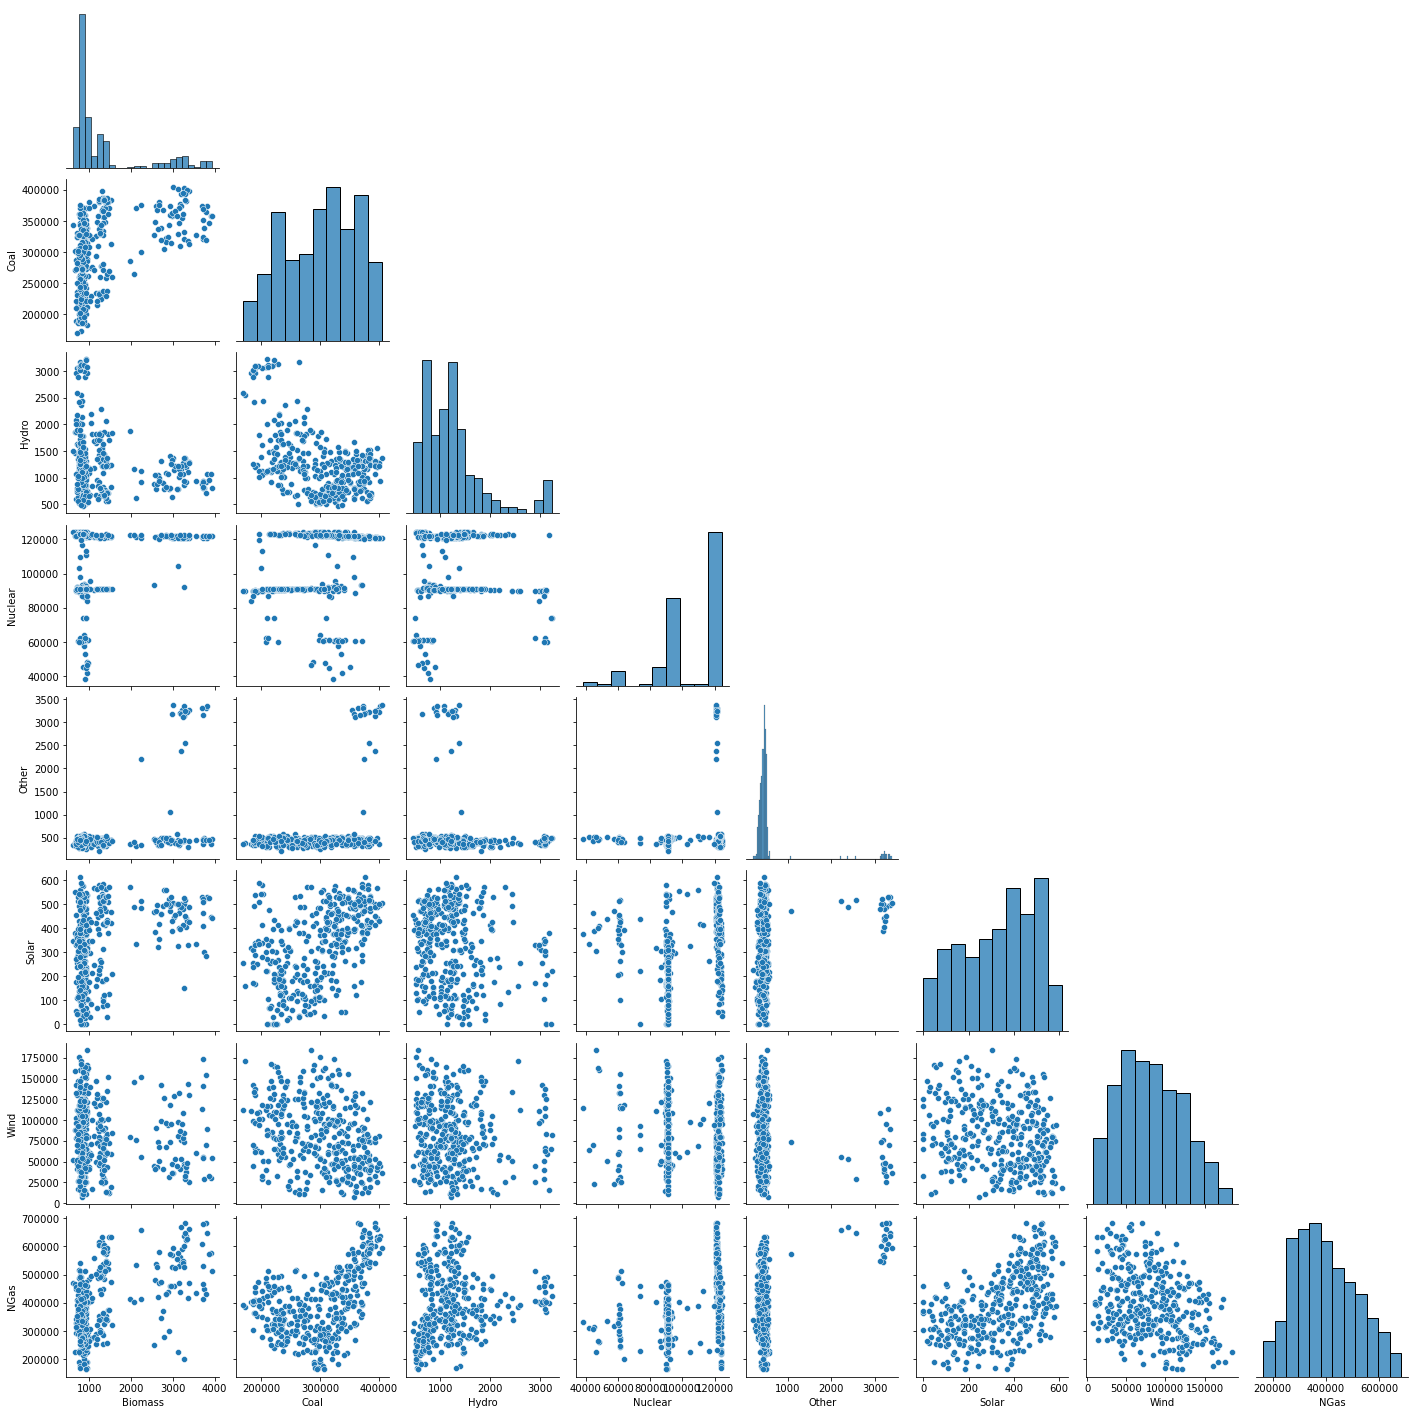

In [21]:
sns.pairplot(full_df, corner=True)

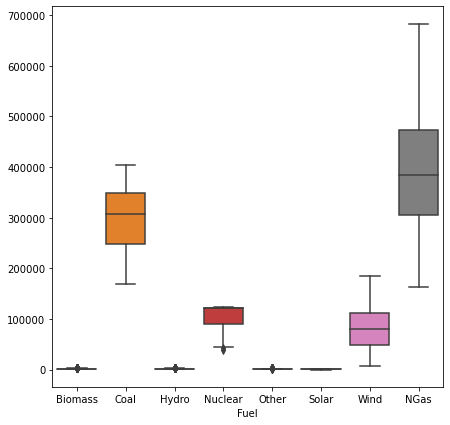

In [23]:
plt.figure(figsize=(7,7))
sns.boxplot(data = full_df,
            
            );

#### Above, we can see that NGas and Coal dominate the electricity genration mix. Additionally, we can see the variability present in the amount of NGas used throughout the year.

### Export the cleaned data

In [25]:
full_df.to_csv('../../data/final_dfs/2012_clean.csv')